In [1]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the main file
df = pd.read_csv('C:/Users/Rohini/Downloads/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Converting Health, Imports and exports to absolute values. (Defines per person spends respectively)
df['Health'] = df.health*df.gdpp
df['Exports'] = df.exports*df.gdpp
df['Imports'] = df.imports*df.gdpp
#Dropping % value columns
df = df.drop(['health','imports','exports'],axis=1)
df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Health,Exports,Imports
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,4191.74,5530.0,24829.7
1,Albania,16.6,9930,4.49,76.3,1.65,4090,26789.50,114520.0,198774.0
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,18598.20,171264.0,140044.0
3,Angola,119.0,5900,22.40,60.1,6.16,3530,10060.50,219919.0,151437.0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,73566.00,555100.0,718580.0


In [4]:
df.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Health,Exports,Imports
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,105673.320419,7.420619e+05,6.588352e+05
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,180140.890556,1.797389e+06,1.471081e+06
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1282.120000,1.076920e+02,6.510920e+01
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,7853.550000,4.471400e+04,6.402150e+04
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,32188.600000,1.777440e+05,2.045580e+05
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,97694.000000,7.278000e+05,7.719600e+05
max,208.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,866360.000000,1.837500e+07,1.491000e+07


In [5]:
df.shape

(167, 10)

In [6]:
#checking for null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
Health        167 non-null float64
Exports       167 non-null float64
Imports       167 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
#Removing country column to perform Standardization
df1 = df.drop(['country'],axis=1)
df1.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Health,Exports,Imports
0,90.2,1610,9.44,56.2,5.82,553,4191.74,5530.0,24829.7
1,16.6,9930,4.49,76.3,1.65,4090,26789.50,114520.0,198774.0
2,27.3,12900,16.10,76.5,2.89,4460,18598.20,171264.0,140044.0
3,119.0,5900,22.40,60.1,6.16,3530,10060.50,219919.0,151437.0
4,10.3,19100,1.44,76.8,2.13,12200,73566.00,555100.0,718580.0


In [8]:
# Performing Standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_df = standard_scaler.fit_transform(df1)
scaled_df

C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -0.8082454 ,  0.15733622, ..., -0.56503989,
        -0.4110113 , -0.4322755 ],
       [-0.5389489 , -0.3753689 , -0.31234747, ..., -0.43921769,
        -0.35019096, -0.31367739],
       [-0.27283273, -0.22084447,  0.78927429, ..., -0.48482608,
        -0.31852577, -0.35372048],
       ...,
       [-0.37231541, -0.65840354,  0.40973191, ..., -0.53848844,
        -0.36146329, -0.37757179],
       [ 0.44841668, -0.65892382,  1.50091625, ..., -0.55059641,
        -0.39216643, -0.41847942],
       [ 1.11495062, -0.72135793,  0.59001454, ..., -0.54049845,
        -0.38395214, -0.41844533]])

In [9]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [10]:
#Doing the PCA on the standardized data
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [11]:
pca.components_

array([[-0.31639186,  0.38004113, -0.14308531,  0.34385651, -0.30284224,
         0.39998795,  0.358535  ,  0.34288671,  0.34486492],
       [ 0.47626735,  0.12838448,  0.22126089, -0.36981973,  0.4597152 ,
         0.2006241 ,  0.1550529 ,  0.39731091,  0.37078075],
       [-0.15001225,  0.14576421,  0.94841868,  0.19675173, -0.07783431,
         0.01033941, -0.07570322, -0.03057367, -0.07217386],
       [-0.14805195, -0.15480592, -0.00762798, -0.01839465, -0.21392805,
        -0.36477239, -0.59971228,  0.44942527,  0.46179779],
       [ 0.1019948 ,  0.79407469, -0.13642345, -0.15404105, -0.02033568,
         0.08750149, -0.49319984, -0.03853829, -0.2527867 ],
       [ 0.19658519, -0.03814681,  0.10840284, -0.58600986, -0.75390075,
         0.04538167,  0.18069888, -0.03891112, -0.01217988],
       [ 0.76126725, -0.02311312, -0.02207663,  0.58120846, -0.27314534,
        -0.04402264, -0.06461567, -0.01366973,  0.02718244],
       [ 0.00644411,  0.3938113 , -0.00607016,  0.002966  ,  0

In [12]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

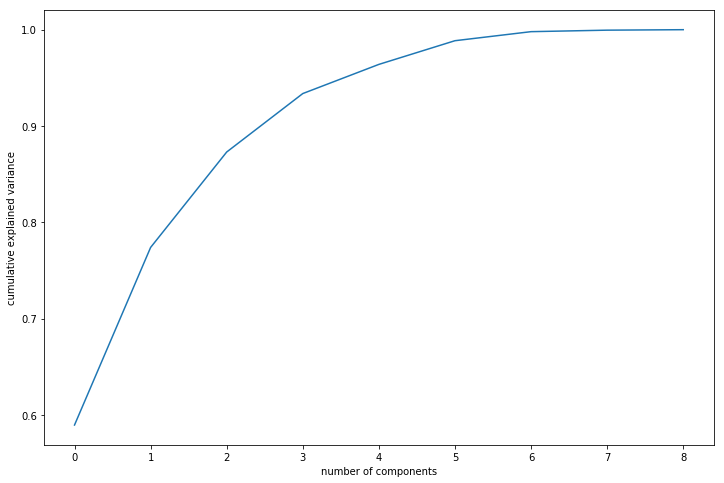

In [13]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Since around 93% of data is being explained with 3 components, going ahead with 3 PCA variables 

In [14]:
#Understanding how the original 9 variables are loaded on the principal components. It can be verified from above as well.
colnames = list(df1.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pcs_df

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,income,0.380041,0.128384,0.145764
2,inflation,-0.143085,0.221261,0.948419
3,life_expec,0.343857,-0.369820,0.196752
4,total_fer,-0.302842,0.459715,-0.077834
5,gdpp,0.399988,0.200624,0.010339
6,Health,0.358535,0.155053,-0.075703
7,Exports,0.342887,0.397311,-0.030574
8,Imports,0.344865,0.370781,-0.072174


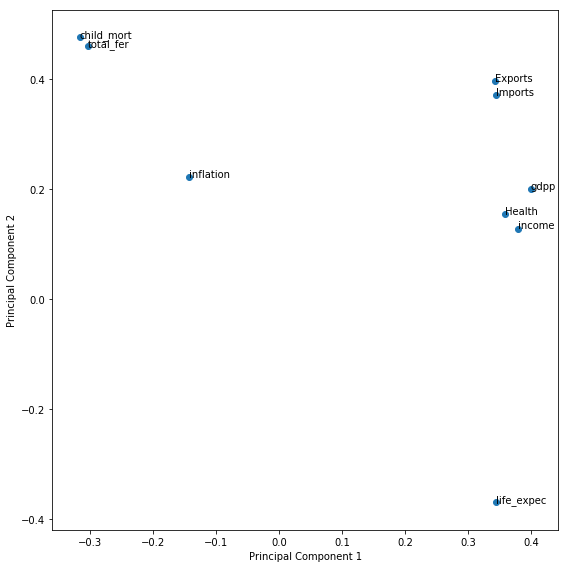

In [15]:
# plotting them to visualise on how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [53]:
#dimenstionality reduction using the 3 Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=3)

In [54]:
df_pca = pca_final.fit_transform(scaled_df)
df_pca.shape

(167, 3)

In [55]:
df_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [56]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [57]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})

In [58]:
#PCA dataframe
pcs_df2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


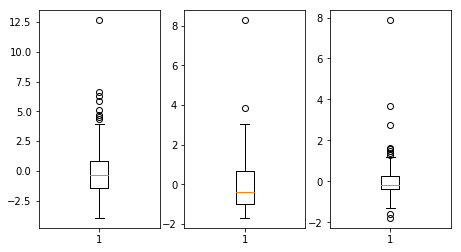

In [59]:
#visualizing the 3 components and checking for outliers
plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.boxplot(pcs_df2.PC1)

plt.subplot(1,4,2)
plt.boxplot(pcs_df2.PC2)

plt.subplot(1,4,3)
plt.boxplot(pcs_df2.PC3)

plt.show()

In [60]:
pcs_df2.shape

(167, 3)

### Hopkins measure

In [61]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [62]:
#Let's check the Hopkins measure
hopkins(pcs_df2)

0.8324658802305916

In [63]:
pcs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
PC1    167 non-null float64
PC2    167 non-null float64
PC3    167 non-null float64
dtypes: float64(3)
memory usage: 4.0 KB


### K means clustering

In [27]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

In [64]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df2)
    sse_.append([k, silhouette_score(pcs_df2, kmeans.labels_)])

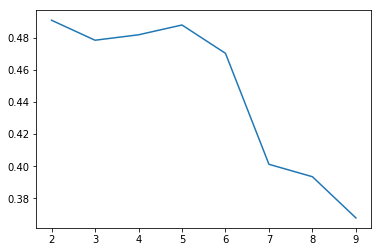

In [65]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

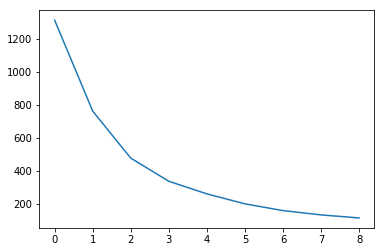

In [66]:
## From the above analysis we find that 2 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [67]:
#Here also we're seeing a distinct bend at around 2 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=2
model_clus2 = KMeans(n_clusters = 2, max_iter=50,random_state = 50)
model_clus2.fit(pcs_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [68]:
# Adding clusters formed to the PCA data frame
data =pcs_df2
data.index = pd.RangeIndex(len(data.index))
dat_km = pd.concat([data, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','ClusterID']
dat_km.head()

,PC1,PC2,PC3,ClusterID
0,-2.637442,1.469038,-0.541359,1
1,-0.022277,-1.431896,-0.020701,1
2,-0.457626,-0.673301,0.961867,1
3,-2.724520,2.174583,0.606687,1
4,0.649849,-1.024374,-0.250103,1


In [69]:
# Checking number of countries assigned to both clusters  
dat_km['ClusterID'].value_counts()

1    130
0     37
Name: ClusterID, dtype: int64

C:\Users\Rohini\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rohini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rohini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rohini\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


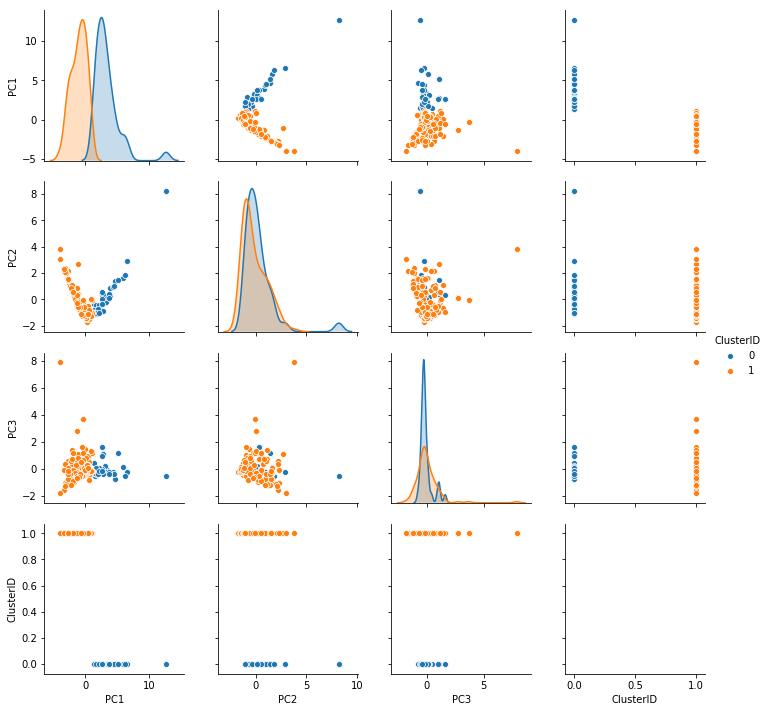

In [34]:
#Data Visualization of all 3 PCA variables across both clusters
sns.pairplot(hue='ClusterID',data=dat_km)

In [35]:
#merging clusters with with main df
main_df=pd.merge(df,dat_km, left_index=True,right_index=True)
main_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Health,Exports,Imports,PC1,PC2,PC3,ClusterID
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,4191.74,5530.0,24829.7,-2.636647,1.472085,-0.546500,1
1,Albania,16.6,9930,4.49,76.3,1.65,4090,26789.50,114520.0,198774.0,-0.023845,-1.435816,-0.009080,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,18598.20,171264.0,140044.0,-0.459260,-0.678794,0.967852,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,10060.50,219919.0,151437.0,-2.723581,2.176018,0.597794,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,73566.00,555100.0,718580.0,0.648777,-1.026498,-0.244170,1


In [36]:
#Dropping PCA variables from main data frame
main_df = main_df.drop(['PC1','PC2','PC3'],axis=1)
main_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Health,Exports,Imports,ClusterID
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,4191.74,5530.0,24829.7,1
1,Albania,16.6,9930,4.49,76.3,1.65,4090,26789.50,114520.0,198774.0,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,18598.20,171264.0,140044.0,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,10060.50,219919.0,151437.0,1
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,73566.00,555100.0,718580.0,1


In [37]:
main_df['ClusterID'].value_counts()

1    130
0     37
Name: ClusterID, dtype: int64

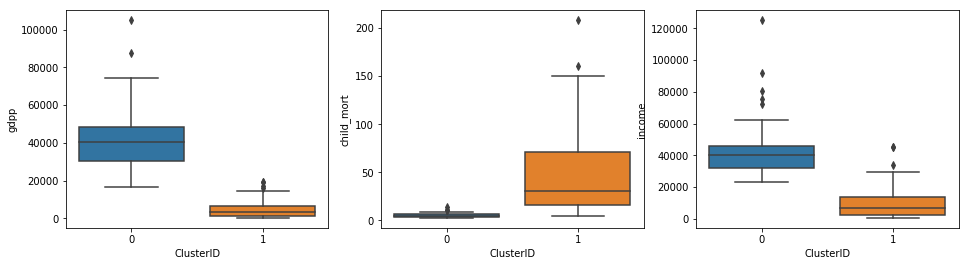

In [38]:
#Visualizing and checking for outliers on main 3 variables across both clusters 
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(x='ClusterID',y='gdpp',data=main_df)

plt.subplot(1,3,2)
sns.boxplot(x='ClusterID',y='child_mort',data=main_df)

plt.subplot(1,3,3)
sns.boxplot(x='ClusterID',y='income',data=main_df)

plt.show()

#### Looking like countries under cluster 1 are poor and requires aid. But problem is there are total 130 countries under cluster 1 and hence proceeding with hierarchical clustering

## Hierarchical Clustering

In [39]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

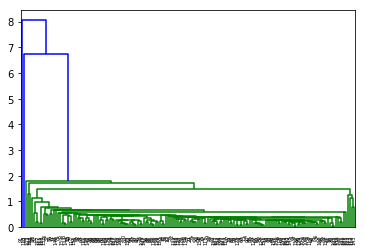

In [40]:
# single linkage
mergings = linkage(pcs_df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

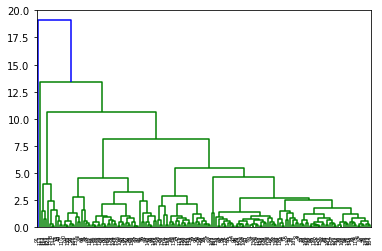

In [41]:
# complete linkage
mergings = linkage(pcs_df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Breaking the tree at 5 number of clusters looks like a good idea

In [42]:
# 5 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [43]:
# assign cluster labels
main_df['Hierarchical Clustering'] = cluster_labels
main_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Health,Exports,Imports,ClusterID,Hierarchical Clustering
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,4191.74,5530.0,24829.7,1,0
1,Albania,16.6,9930,4.49,76.3,1.65,4090,26789.50,114520.0,198774.0,1,1
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,18598.20,171264.0,140044.0,1,1
3,Angola,119.0,5900,22.40,60.1,6.16,3530,10060.50,219919.0,151437.0,1,0
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,73566.00,555100.0,718580.0,1,1


In [44]:
main_df['ClusterID'].value_counts()

1    130
0     37
Name: ClusterID, dtype: int64

In [45]:
# checking number of countries under each of the clusters
main_df['Hierarchical Clustering'].value_counts()

1    107
0     47
2     11
4      1
3      1
Name: Hierarchical Clustering, dtype: int64

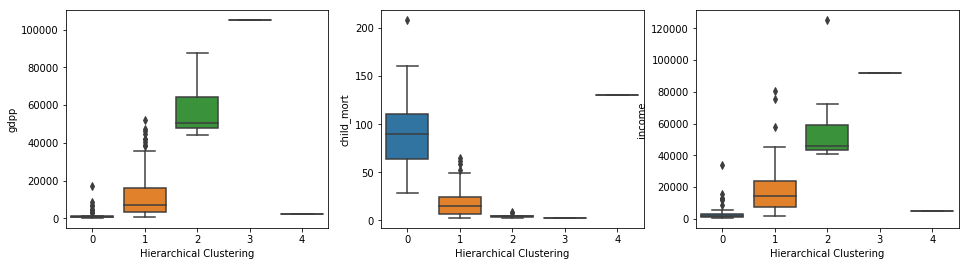

In [46]:
# Visualising and checking for outliers on 3 main variables across all clusters
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.boxplot(x='Hierarchical Clustering',y='gdpp',data=main_df)

plt.subplot(1,3,2)
sns.boxplot(x='Hierarchical Clustering',y='child_mort',data=main_df)

plt.subplot(1,3,3)
sns.boxplot(x='Hierarchical Clustering',y='income',data=main_df)

plt.show()

### Choosing Hierarchical Clustering method using which we determined, countries under cluster 0 are in dire need of aid. Further analysis is made below

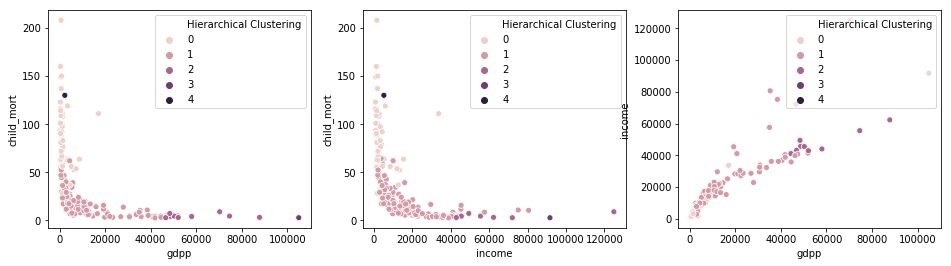

In [47]:
# Visualizing main 3 variables across clusters again to see how they are placed
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.scatterplot(x='gdpp',y='child_mort',hue='Hierarchical Clustering',legend='full',data=main_df)
plt.subplot(1,3,2)
sns.scatterplot(x='income',y='child_mort',hue='Hierarchical Clustering',legend='full',data=main_df)
plt.subplot(1,3,3)
sns.scatterplot(x='gdpp',y='income',hue='Hierarchical Clustering',legend='full',data=main_df)

plt.show()

### Clearly, Countries under cluster 0 need a helping hand. Deep dive into cluster 0 and removing few outliers

In [48]:
#filtering countries under Cluster 0
back_df = main_df.loc[main_df['Hierarchical Clustering'] == 0]
back_df.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Health,Exports,Imports,ClusterID,Hierarchical Clustering
0,Afghanistan,90.2,1610,9.440,56.2,5.82,553,4191.74,5530.0,24829.7,1,0
3,Angola,119.0,5900,22.400,60.1,6.16,3530,10060.50,219919.0,151437.0,1,0
17,Benin,111.0,1820,0.885,61.8,5.36,758,3107.80,18040.4,28197.6,1,0
21,Botswana,52.5,13300,8.920,57.1,2.88,6350,52705.00,276860.0,325755.0,1,0
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,3875.50,11040.0,17020.0,1,0


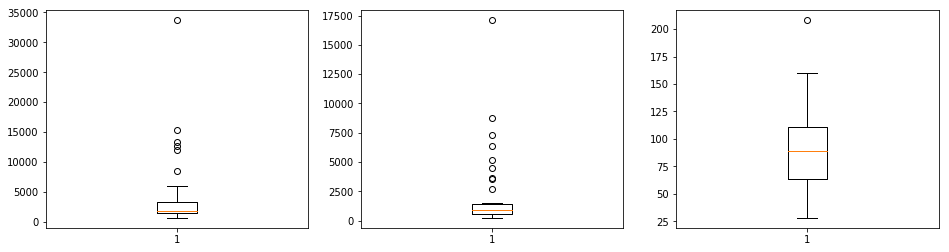

In [49]:
# Visualizing 3 main variables for countries under cluster 0
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.boxplot(back_df.income)
plt.subplot(1,3,2)
plt.boxplot(back_df.gdpp)
plt.subplot(1,3,3)
plt.boxplot(back_df.child_mort)
plt.show()

In [50]:
#Removing few outliers in all 3 dimensions
back_df = back_df.loc[(back_df.income < back_df.income.mean())]
back_df = back_df.loc[(back_df.gdpp < back_df.gdpp.mean())]
back_df = back_df.loc[(back_df.child_mort > back_df.child_mort.quantile(0.75))]

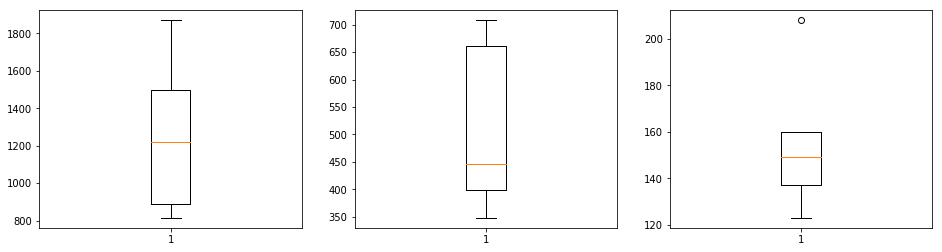

In [51]:
# Visualizing after removing outliers
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.boxplot(back_df.income)
plt.subplot(1,3,2)
plt.boxplot(back_df.gdpp)
plt.subplot(1,3,3)
plt.boxplot(back_df.child_mort)
plt.show()

In [52]:
# Final set of countries which need dire help
back_df[['country','income','gdpp','child_mort']]

,country,income,gdpp,child_mort
31,Central African Republic,888,446,149.0
66,Haiti,1500,662,208.0
97,Mali,1870,708,137.0
112,Niger,814,348,123.0
132,Sierra Leone,1220,399,160.0


### Countries: Central African Republic	, Haiti, Mali, Niger & Sierra Leone	 are the ones whose income & gdpp is very less compared to others and also high on child Mort.  Hence suggesting these countris to be helped.